<div style='display: flex;'>
    <h1>Machine Learning on Asteroid dataset</h1>
    <img src='asteroid.jpeg' height='150px' width='100px'/>
</div>

<div style="border: 1px dashed black;
            padding: 10px 10px 10px 10px;">
    <h4>Machine Learning general workflow :</h4>
    <ol>
        <li><a href='#part1'>Defining a quantitative objective</a></li>
        <li><a href='#part2'>EDA (Exploratory Data Analysis):</a> Understanding as much as possible the data in order to define modelling strategy.
        <ul>
            <li><a href='#part2.1'><span style="color: blue;">Number of rows and columns</span></a></li>
            <li><a href='#part2.2'><span style="color: blue;">Identifying the target</span></a></li>
            <li><a href='#part2.3'><span style="color: blue;">Variables types</span></a></li>
            <li><a href='#part2.4'><span style="color: blue;">Identification of missing values</span></a></li>
            <li><a href='#part2.5'><span style="color: red;">Visualizing the target</span></a></li>
            <li><a href='#part2.6'><span style="color: red;">Understanding all the variables</span></a></li>
            <li><a href='#part2.7'><span style="color: red;">Visualizing relationships between the target and the features</span></li>
            <li><a href='#part2.8'><span style="color: red;">Identifying outliers</span></a></li>
        </ul></li>
        <li><a href='#part3'>Pre-Processing: </a>Transforming the data in order to have a proper input for modelling.
        <ul>
            <li>Splitting data into Train set and Test set</li>
            <li>Removing/Replacing NA</li>
            <li>Encoding variables</li>
            <li>Removing outliers which drop down model performances</li>
            <li>Feature selection</li>
            <li>Feature engineering</li>
            <li>Feature scaling</li>
        </ul></li>
        <li><a href='#part4'>Modelling: </a> Giving answer to the former objective.
        <ul>
            <li>Defining a scoring function</li>
            <li>Training of the differents models</li>
            <li>Optimization with GridSearchCV</li>
            <li>(Optional) Analysis of errors and go back to EDA/Pre processing</li>
            <li>Learning curve and decision</li>
        </ul></li>
    </ol>
    <p>(<span style="color: blue;">*="front-end" part</span>, <br/>
        <span style="color: red;">*="back-end" part</span>)</p>
          <a href='https://scikit-learn.org/stable/index.html#' target='_blank'>See Scikit-Learn documentation</a>
        <br/>
        <a href='https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html' target='_blank'>See Scikit-Learn scheme for choosing the right model</a>
        <br/>
        <a href='https://www.datacourses.com/classification-model-evaluation-metrics-in-scikit-learn-924/', target='_blank'>See external ressouces about classification metrics</a>
    </p>
</div>

Data can be found at <a href='https://www.kaggle.com/sakhawat18/asteroid-dataset/' target='_blank'>https://www.kaggle.com/sakhawat18/asteroid-dataset/</a>

<a id='part1'><h2>1) Objective</h2></a>

Classify asteroid in different harmfulness classes. Huge class disequelibrium so Accuracy seems not to be the better choice for a metrics.

<a id='part2'><h2>2) EDA</h2></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PATH = '/media/anthony/USOPP/Kaggle/asteroid.csv'

<h3 style='text-decoration: underline;'>Number of rows and columns</h3>

In [24]:
asteroid = pd.read_csv(PATH)
print(f'{asteroid.shape[0]} rows x {asteroid.shape[1]} columns')
asteroid.head(n=15)

/media/anthony/USOPP/conda/IA/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


958524 rows x 45 columns


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
5,a0000006,2000006,6 Hebe,6,Hebe,NaN,N,N,5.80,185.180,...,2.191800e-06,1.122100e-05,1.300600e-05,7.392200e-06,3.306700e-09,4.438800e-10,2.875400e-05,2.344500e-06,MBA,0.41032
6,a0000007,2000007,7 Iris,7,Iris,NaN,N,N,5.60,199.830,...,2.582500e-06,2.641200e-05,2.707500e-05,7.014700e-06,2.469500e-09,3.370100e-10,2.662700e-05,1.699400e-06,MBA,0.38128
7,a0000008,2000008,8 Flora,8,Flora,NaN,N,N,6.50,147.491,...,3.240300e-06,2.432000e-05,2.664600e-05,1.209200e-05,2.668100e-09,4.746200e-10,4.018700e-05,1.876500e-06,MBA,0.54186
8,a0000009,2000009,9 Metis,9,Metis,NaN,N,N,6.30,190.000,...,2.007400e-06,2.417000e-05,2.600800e-05,1.036600e-05,3.470200e-09,5.192700e-10,3.870700e-05,2.614600e-06,MBA,0.44895
9,a0000010,2000010,10 Hygiea,10,Hygiea,NaN,N,N,5.50,407.120,...,2.173400e-06,2.855200e-05,3.023700e-05,1.124600e-05,7.699800e-09,5.847400e-10,6.482900e-05,6.724400e-06,MBA,0.53434


In [25]:
#removing useless id columns in order to reduce shape of the dataset
col_to_remove = ['id', 'full_name', 'name', 'spkid', 'orbit_id', 'prefix']
asteroid.drop(columns=col_to_remove, inplace=True)
print(f'Now {asteroid.shape[1]} columns')

Now 39 columns


<h3 style='text-decoration: underline;'>Identification of the target</h3>

The targt is the <strong>pha</strong> flag variable (PHA = Potentially Hazardous Asteroid).

<h3 style='text-decoration: underline;'>Variables types</h3>

float64    33
object      5
int64       1
dtype: int64


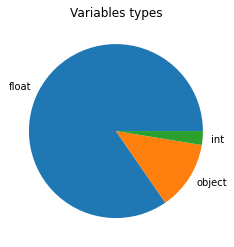

In [26]:
plt.pie(asteroid.dtypes.value_counts(), labels=['float', 'object', 'int'])
plt.title('Variables types')
print(asteroid.dtypes.value_counts())

Most of the features are quantitaive, which is a good source of information.

<h3 style='text-decoration: underline;'>Identification of missing values</h3>

In [27]:
(asteroid.isna().sum(axis=0)/asteroid.shape[0]).sort_values(ascending=True)

pdes              0.000000
tp_cal            0.000000
tp                0.000000
class             0.000000
w                 0.000000
om                0.000000
i                 0.000000
q                 0.000000
a                 0.000000
e                 0.000000
n                 0.000000
epoch_cal         0.000000
epoch_mjd         0.000000
epoch             0.000000
equinox           0.000000
per_y             0.000001
ma                0.000001
rms               0.000002
ad                0.000004
neo               0.000004
per               0.000004
moid_ld           0.000132
H                 0.006534
moid              0.020783
pha               0.020783
sigma_e           0.020784
sigma_a           0.020784
sigma_i           0.020784
sigma_om          0.020784
sigma_w           0.020784
sigma_ma          0.020784
sigma_n           0.020784
sigma_tp          0.020784
sigma_q           0.020784
sigma_ad          0.020788
sigma_per         0.020788
diameter          0.857897
d

We will drop the 'prefix' column (99.99% of missing values) and also entry whom target variable has missing value.</br>
Too much entry for a heatmap of missing data localization.

In [44]:
asteroid = asteroid.iloc[:, :][pd.notnull(asteroid.pha)]
print(f'{asteroid.shape[0]} lines after filtering')

938603 lines after filtering


<h3 style='text-decoration: underline;'>Visualizing the target</h3>

N    936537
Y      2066
Name: pha, dtype: int64


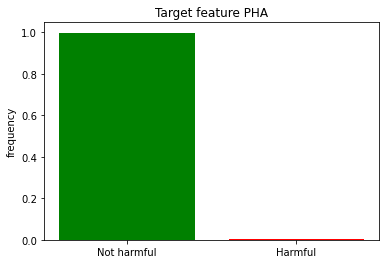

In [68]:
pd.unique(asteroid.pha)
plt.bar(x=['Not harmful', 'Harmful'], 
        height=asteroid.pha.value_counts().values/asteroid.shape[0],
        color=['green', 'red'])
plt.ylabel('frequency')
plt.title('Target feature PHA')
print(asteroid.pha.value_counts())

We see a huge class-disequelibrium, so the accuracy metrics seems not to be a good choice.

<h3 style='text-decoration : underline;'>Understanding of the features</h3>